*This Notebook has been created by PALISSON Antoine.*<br>


In [1]:
# Basic packages
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tensorflow
import tensorflow as tf

# Preprocessing

In this exercise, we will use an income dataset: `'adult.csv'`.

**<font color='blue'>1. Load the dataset and show its content.**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Cours/Deep Learning/Exercices/Datasets/adult.csv').dropna()
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


**<font color='blue'>2. Separate the features and the label (the `income` variable).**

In [4]:
X = df.copy()
y = X.pop('income')

**<font color='blue'>3. Create a test and validation set.**

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.1/(1-0.2),stratify=y_train,random_state=42)

print(X_train.shape, X_test.shape, X_val.shape)

(34188, 14) (9769, 14) (4885, 14)


**<font color='blue'>4. Preprocess the data.**

*Tips: The preprocessing is different for the numerical and the categorical data*

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (OneHotEncoder,
                                   LabelEncoder, 
                                   StandardScaler)

ohe = OneHotEncoder(drop='if_binary', handle_unknown='ignore')
std = StandardScaler()
lbe = LabelEncoder()

cat_col = X_train.select_dtypes(include='object').columns
cat_col = np.concatenate([cat_col, np.array(['educational-num'])], axis=-1)
num_col = X_train.drop(columns=cat_col).columns

ct = ColumnTransformer([('cat', ohe, cat_col),
                        ('num', std, num_col)])

X_train_t = ct.fit_transform(X_train)
X_val_t = ct.transform(X_val)
X_test_t = ct.transform(X_test)

y_train_t = lbe.fit_transform(y_train)
y_val_t = lbe.transform(y_val)
y_test_t = lbe.transform(y_test)

# Benchmark

In this part, you will build a **benchmark** to compare the effect of the optimizer algorithms and the learning rate.

Here is a small function that should be run before every training to reset the seeds.<br> This ensures that the **randomness is always the same during training**, hence making the results comparable.

In [2]:
def reset_seeds():
    os.environ['PYTHONHASHSEED']=str(2)
    tf.random.set_seed(2)
    np.random.seed(2)
    random.seed(2)

**<font color='blue'>1. Build a model architecture that contains 2 hidden layers with 16 neurons and a ReLU activation.<br> The remaining parameters are set to default.<br> Add the appropriate output layer.**

*Tips: You should run the reset_seeds() function at the beginning of the cell.*

In [ ]:
tf.keras.backend.clear_session()
reset_seeds()

# Architecture
inputs = tf.keras.Input((X_train_t.shape[1],))

dense_1 = tf.keras.layers.Dense(16, activation='relu')(inputs)

dense_2 = tf.keras.layers.Dense(16, activation='relu')(dense_1)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense_2)

bench_model = tf.keras.Model(inputs=inputs, outputs=outputs)

**<font color='blue'>2. Compile the model with the SGD optimizer, a learning rate of 0.005 and the appropriate loss.**

In [ ]:
# Compiling
bench_model.compile(optimizer=tf.keras.optimizers.experimental.SGD(learning_rate=0.005),
                    loss=tf.keras.losses.BinaryCrossentropy(),
                    metrics=['Accuracy'])

**<font color='blue'>3. Train the model for 10 epochs with a batch size of 32.**

*Tips: Don't forget the validation data !*

In [ ]:
# Training
epochs = 10
batch_size = 32
bench_history = bench_model.fit(X_train_t, y_train_t,
                                epochs=epochs,
                                batch_size=batch_size,
                                validation_data=(X_val_t, y_val_t))

Epoch 1/10
1069/1069 [==============================] - 13s 6ms/step - loss: 0.5488 - Accuracy: 0.7515 - val_loss: 0.4707 - val_Accuracy: 0.7652
Epoch 2/10
1069/1069 [==============================] - 5s 4ms/step - loss: 0.4236 - Accuracy: 0.7809 - val_loss: 0.3868 - val_Accuracy: 0.8115
Epoch 3/10
1069/1069 [==============================] - 5s 4ms/step - loss: 0.3710 - Accuracy: 0.8244 - val_loss: 0.3570 - val_Accuracy: 0.8350
Epoch 4/10
1069/1069 [==============================] - 5s 4ms/step - loss: 0.3504 - Accuracy: 0.8344 - val_loss: 0.3427 - val_Accuracy: 0.8436
Epoch 5/10
1069/1069 [==============================] - 5s 4ms/step - loss: 0.3388 - Accuracy: 0.8413 - val_loss: 0.3340 - val_Accuracy: 0.8481
Epoch 6/10
1069/1069 [==============================] - 5s 4ms/step - loss: 0.3314 - Accuracy: 0.8449 - val_loss: 0.3278 - val_Accuracy: 0.8536
Epoch 7/10
1069/1069 [==============================] - 4s 4ms/step - loss: 0.3263 - Accuracy: 0.8489 - val_loss: 0.3242 - val_Accuracy

**<font color='blue'>4. Display the loss curves (training & validation).** 

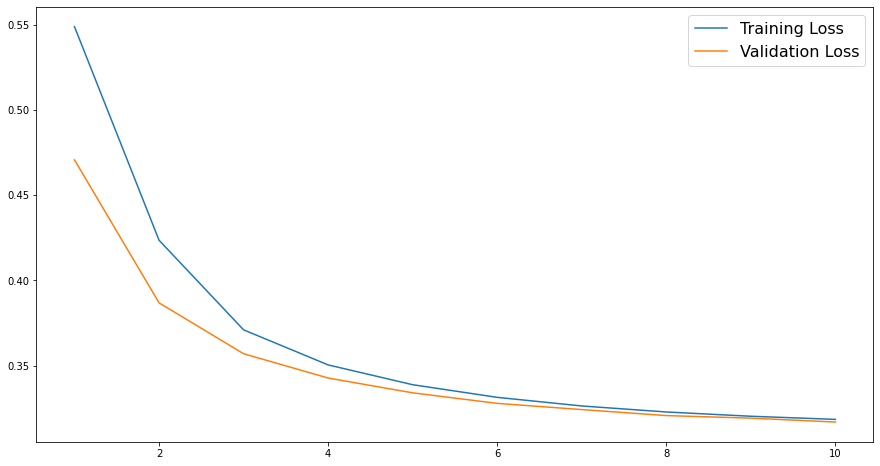

In [ ]:
# Learning Curves
bench_loss = bench_history.history

plt.figure(figsize=(15,8))

plt.plot(np.arange(1,epochs+1), bench_loss['loss'], label='Training Loss')
plt.plot(np.arange(1,epochs+1), bench_loss['val_loss'], label='Validation Loss')

plt.legend(fontsize=16)
plt.show()

# Optimizers

Momentum is a hyperparameter that controls the influence of previous gradients on the current update. It can be added to the SGD algorithm.

A higher momentum value means that the optimizer will take more of the previous gradients into account when calculating the current update, which can help the optimizer to converge faster and avoid getting stuck in local minima. A lower momentum value can help the optimizer to explore the parameter space more thoroughly, but may also slow down convergence.

The most common values for momentum are between 0.9 and 0.99.

**<font color='blue'>1. Using the same architecture as the benchmark model, add some momentum to the SGD optimizer using its `momentum` parameter.**

In [ ]:
tf.keras.backend.clear_session()
reset_seeds()

# Architecture
inputs = tf.keras.Input((X_train_t.shape[1],))
dense_1 = tf.keras.layers.Dense(16, activation='relu')(inputs)
dense_2 = tf.keras.layers.Dense(16, activation='relu')(dense_1)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense_2)
model_sgd_m = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compiling
model_sgd_m.compile(optimizer=tf.keras.optimizers.experimental.SGD(learning_rate=0.005,
                                                                   momentum=0.9),
                    loss=tf.keras.losses.BinaryCrossentropy(),
                    metrics=['Accuracy'])

# Training
history_sgd_m = model_sgd_m.fit(X_train_t, y_train_t,
                                epochs=epochs,
                                batch_size=batch_size,
                                validation_data=(X_val_t, y_val_t))

Epoch 1/10
1069/1069 [==============================] - 6s 5ms/step - loss: 0.3742 - Accuracy: 0.8238 - val_loss: 0.3181 - val_Accuracy: 0.8538
Epoch 2/10
1069/1069 [==============================] - 4s 4ms/step - loss: 0.3185 - Accuracy: 0.8501 - val_loss: 0.3118 - val_Accuracy: 0.8579
Epoch 3/10
1069/1069 [==============================] - 4s 4ms/step - loss: 0.3138 - Accuracy: 0.8530 - val_loss: 0.3095 - val_Accuracy: 0.8573
Epoch 4/10
1069/1069 [==============================] - 4s 4ms/step - loss: 0.3118 - Accuracy: 0.8549 - val_loss: 0.3086 - val_Accuracy: 0.8604
Epoch 5/10
1069/1069 [==============================] - 5s 4ms/step - loss: 0.3108 - Accuracy: 0.8543 - val_loss: 0.3097 - val_Accuracy: 0.8551
Epoch 6/10
1069/1069 [==============================] - 5s 4ms/step - loss: 0.3094 - Accuracy: 0.8552 - val_loss: 0.3067 - val_Accuracy: 0.8610
Epoch 7/10
1069/1069 [==============================] - 4s 4ms/step - loss: 0.3079 - Accuracy: 0.8560 - val_loss: 0.3081 - val_Accuracy:

**<font color='blue'>2. Compare the result with the benchmark.**

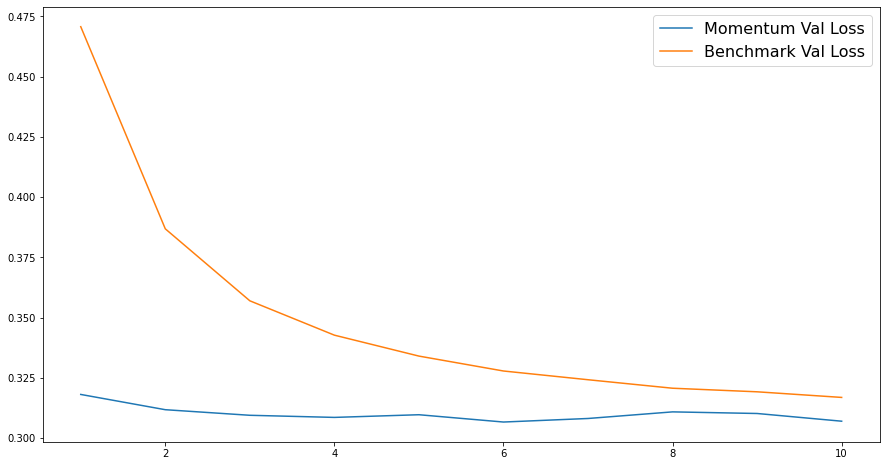

In [ ]:
# Learning Curves
plt.figure(figsize=(15,8))

plt.plot(np.arange(1,epochs+1), history_sgd_m.history['val_loss'], label='Momentum Val Loss')
plt.plot(np.arange(1,epochs+1), bench_loss['val_loss'], label='Benchmark Val Loss')

plt.legend(fontsize=16)
plt.show()

**<font color='blue'>3. Add both the momentum and the Nesterov Momentum (`nesterov=True`) to the SGD optimizer.<br> Train the model and compare the results.**

In [ ]:
tf.keras.backend.clear_session()
reset_seeds()

# Architecture
inputs = tf.keras.Input((X_train_t.shape[1],))
dense_1 = tf.keras.layers.Dense(16, activation='relu')(inputs)
dense_2 = tf.keras.layers.Dense(16, activation='relu')(dense_1)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense_2)
model_sgd_mn = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compiling
model_sgd_mn.compile(optimizer=tf.keras.optimizers.experimental.SGD(learning_rate=0.005,
                                                                    momentum=0.9,
                                                                    nesterov=True),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['Accuracy'])

# Training
history_sgd_mn = model_sgd_mn.fit(X_train_t, y_train_t,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  validation_data=(X_val_t, y_val_t))

Epoch 1/10
1069/1069 [==============================] - 6s 5ms/step - loss: 0.3734 - Accuracy: 0.8240 - val_loss: 0.3179 - val_Accuracy: 0.8542
Epoch 2/10
1069/1069 [==============================] - 4s 4ms/step - loss: 0.3182 - Accuracy: 0.8498 - val_loss: 0.3119 - val_Accuracy: 0.8592
Epoch 3/10
1069/1069 [==============================] - 5s 4ms/step - loss: 0.3135 - Accuracy: 0.8531 - val_loss: 0.3095 - val_Accuracy: 0.8588
Epoch 4/10
1069/1069 [==============================] - 5s 4ms/step - loss: 0.3117 - Accuracy: 0.8545 - val_loss: 0.3077 - val_Accuracy: 0.8612
Epoch 5/10
1069/1069 [==============================] - 5s 4ms/step - loss: 0.3102 - Accuracy: 0.8546 - val_loss: 0.3076 - val_Accuracy: 0.8588
Epoch 6/10
1069/1069 [==============================] - 5s 4ms/step - loss: 0.3093 - Accuracy: 0.8552 - val_loss: 0.3061 - val_Accuracy: 0.8604
Epoch 7/10
1069/1069 [==============================] - 5s 4ms/step - loss: 0.3079 - Accuracy: 0.8562 - val_loss: 0.3084 - val_Accuracy:

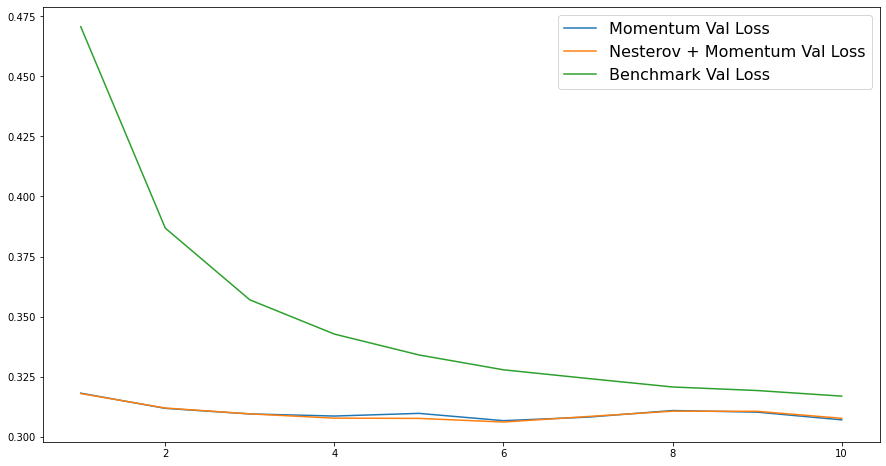

In [ ]:
# Learning Curves
plt.figure(figsize=(15,8))

plt.plot(np.arange(1,epochs+1), history_sgd_m.history['val_loss'], label='Momentum Val Loss')
plt.plot(np.arange(1,epochs+1), history_sgd_mn.history['val_loss'], label='Nesterov + Momentum Val Loss')
plt.plot(np.arange(1,epochs+1), bench_loss['val_loss'], label='Benchmark Val Loss')

plt.legend(fontsize=16)
plt.show()

In TensorFlow, the Adam optimizer is implemented as `tf.keras.optimizers.Adam()`.<br> The beta_1 and the beta_2 parameters refers to the beta_z and beta_s respectively (in the lesson).


**<font color='blue'>4. Using the same architecture as the benchmark model, replace the SGD optimizer by the Adam optimizer.<br> Compare the result.**

In [ ]:
tf.keras.backend.clear_session()
reset_seeds()

# Architecture
inputs = tf.keras.Input((X_train_t.shape[1],))
dense_1 = tf.keras.layers.Dense(16, activation='relu')(inputs)
dense_2 = tf.keras.layers.Dense(16, activation='relu')(dense_1)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense_2)
model_adam = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compiling
model_adam.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                   loss=tf.keras.losses.BinaryCrossentropy(),
                   metrics=['Accuracy'])

# Training
history_adam= model_adam.fit(X_train_t, y_train_t,
                             epochs=epochs,
                             batch_size=batch_size,
                             validation_data=(X_val_t, y_val_t))

Epoch 1/10
1069/1069 [==============================] - 9s 7ms/step - loss: 0.3285 - Accuracy: 0.8442 - val_loss: 0.3073 - val_Accuracy: 0.8571
Epoch 2/10
1069/1069 [==============================] - 5s 4ms/step - loss: 0.3107 - Accuracy: 0.8538 - val_loss: 0.3069 - val_Accuracy: 0.8592
Epoch 3/10
1069/1069 [==============================] - 5s 4ms/step - loss: 0.3067 - Accuracy: 0.8569 - val_loss: 0.3040 - val_Accuracy: 0.8616
Epoch 4/10
1069/1069 [==============================] - 5s 4ms/step - loss: 0.3039 - Accuracy: 0.8561 - val_loss: 0.3065 - val_Accuracy: 0.8588
Epoch 5/10
1069/1069 [==============================] - 5s 4ms/step - loss: 0.3013 - Accuracy: 0.8583 - val_loss: 0.3111 - val_Accuracy: 0.8549
Epoch 6/10
1069/1069 [==============================] - 5s 4ms/step - loss: 0.2985 - Accuracy: 0.8590 - val_loss: 0.3070 - val_Accuracy: 0.8624
Epoch 7/10
1069/1069 [==============================] - 5s 4ms/step - loss: 0.2965 - Accuracy: 0.8603 - val_loss: 0.3107 - val_Accuracy:

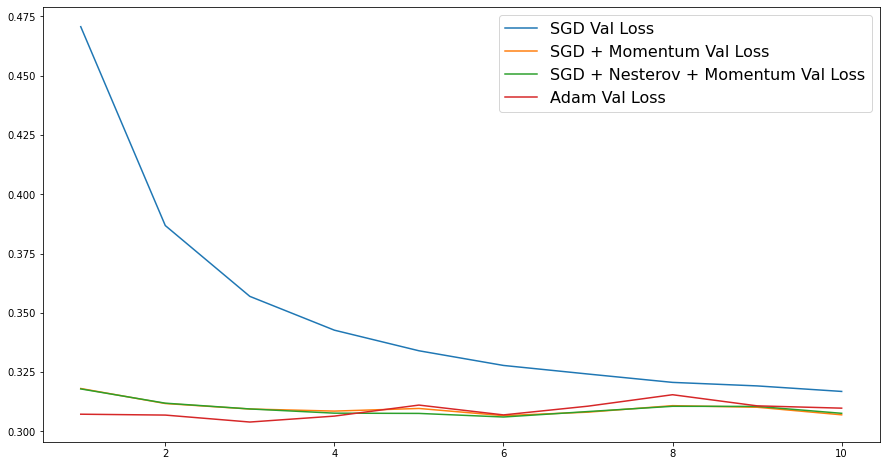

In [ ]:
# Learning Curves
plt.figure(figsize=(15,8))

plt.plot(np.arange(1,epochs+1), bench_loss['val_loss'], label='SGD Val Loss')
plt.plot(np.arange(1,epochs+1), history_sgd_m.history['val_loss'], label='SGD + Momentum Val Loss')
plt.plot(np.arange(1,epochs+1), history_sgd_mn.history['val_loss'], label='SGD + Nesterov + Momentum Val Loss')
plt.plot(np.arange(1,epochs+1), history_adam.history['val_loss'], label='Adam Val Loss')

plt.legend(fontsize=16)
plt.show()

# Learning Rate

## Fixed learning rate

**<font color='blue'>1. Using the benchmark architecture and the Adam optimizer, try the following learning rate values:**<br>
**<font color='blue'>0.00001 / 0.0001 / 0.001 / 0.01 / 0.1 / 1**<br>
**<font color='blue'>Compare the losses**

In [ ]:
def train_adam_lr(lr):
    tf.keras.backend.clear_session()
    reset_seeds()

    # Architecture
    inputs = tf.keras.Input((X_train_t.shape[1],))
    dense_1 = tf.keras.layers.Dense(16, activation='relu')(inputs)
    dense_2 = tf.keras.layers.Dense(16, activation='relu')(dense_1)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense_2)
    model_adam = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling
    model_adam.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                    loss=tf.keras.losses.BinaryCrossentropy(),
                    metrics=['Accuracy'])

    # Training
    history_adam = model_adam.fit(X_train_t, y_train_t,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  validation_data=(X_val_t, y_val_t),
                                  verbose=0)
    
    return history_adam.history['val_loss']

In [ ]:
lr1 = train_adam_lr(1)
lr2 = train_adam_lr(0.1)
lr3 = train_adam_lr(0.01)
lr4 = train_adam_lr(0.001)
lr5 = train_adam_lr(0.0001)
lr6 = train_adam_lr(0.00001)

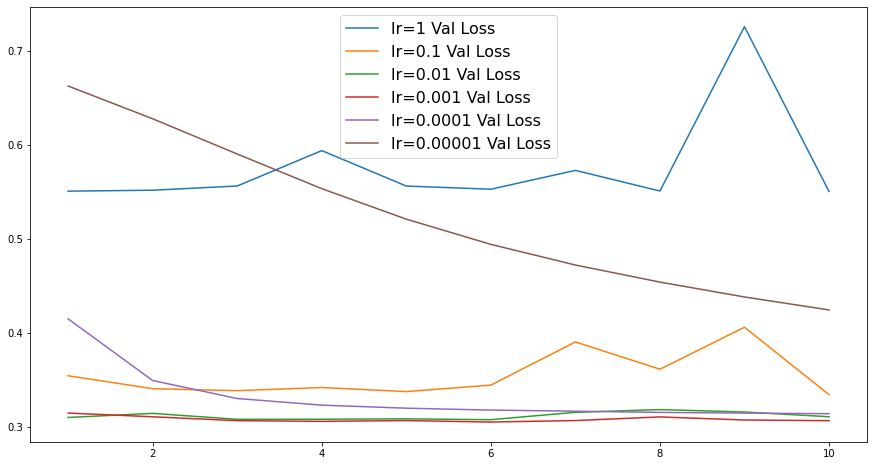

In [ ]:
# Learning Curves
plt.figure(figsize=(15,8))

plt.plot(np.arange(1,epochs+1), lr1, label='lr=1 Val Loss')
plt.plot(np.arange(1,epochs+1), lr2, label='lr=0.1 Val Loss')
plt.plot(np.arange(1,epochs+1), lr3, label='lr=0.01 Val Loss')
plt.plot(np.arange(1,epochs+1), lr4, label='lr=0.001 Val Loss')
plt.plot(np.arange(1,epochs+1), lr5, label='lr=0.0001 Val Loss')
plt.plot(np.arange(1,epochs+1), lr6, label='lr=0.00001 Val Loss')

plt.legend(fontsize=16)
plt.show()

## Learning rate scheduler

In [22]:
# A custom callback to print the learning rate during training.

class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        lr = self.model.optimizer.lr.numpy()
        print(f'Learning rate for epoch {epoch+1} is {lr:.6f}')

printlr = PrintLR()

TensorFlow Keras provides several learning rate schedulers that can be used to adjust the learning rate during training including:


*   **Exponential** decay function - `tf.keras.optimizers.schedules.ExponentialDecay` - [Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay)
    * `decay_rate` (typically ranges between 0.1 and 0.5) parameter controls the rate at which the learning rate decreases
    * `decay_steps` parameter (typically ranges between 1000 and 10000 but depends on the number of instances) controls the instance-based frequency at which the learning rate is decreased
*  **Cosine** decay function - `tf.keras.optimizers.schedules.CosineDecay` -  [Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/CosineDecayRestarts)
    * `alpha` (typically ranges between 0.0 and 1.0) sets the amplitude of the oscillation.
*   **Polynomial** decay function - `tf.keras.optimizers.schedules.PolynomialDecay` - [Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/PolynomialDecay)
    * `power` (typically ranges between 0.5 and 2.0) sets the power of the polynomial.
*   **Power** decay function - `tf.keras.optimizers.schedules.InverseTimeDecay` - [Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/InverseTimeDecay)
*   **Piecewise** decay function - `tf.keras.optimizers.schedules.PiecewiseConstantDecay`: [Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/PiecewiseConstantDecay)
    * `boundaries`: A list of non-decreasing integers that define the steps or epochs at which to apply a new learning rate.
    * `values`: A list of length `len(boundaries) + 1` that specifies the learning rates to apply at each boundary. The first value corresponds to the initial learning rate, and subsequent values correspond to the learning rates after each boundary.
*   **Performance** decay - `tf.keras.callbacks.ReduceLROnPlateau` - [Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau)
    * `factor`: (typically ranges between 0.1 and 0.5) sets the factor by which the learning rate will be reduced.

    * `patience`: (typically ranges between 3 and 10) sets the number of epochs to wait before reducing the learning rate when the monitored metric has stopped improving.

    * `min_delta`: sets the minimum change in the monitored metric that is considered an improvement.

    * `cooldown`: sets the number of epochs to wait after reducing the learning rate before resuming normal operation.

There is also a callback that allows you to define a function to schedule the learning rate based on the epoch number or the current iteration number `tf.keras.callbacks.LearningRateScheduler` [Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/LearningRateSchedule).

The `tf.keras.optimizers.schedules` schedulers must be passed to the `learning_rate` parameter of the optimizer during the model compiling phase.

**<font color='blue'>1.a. Use an piecewise decay learning rate scheduler with three boundaries (i.e. four different learning rates) using the benchmark architecture and the Adam optimizer.<br>1.b. Display the learning curves.**

In [23]:
tf.keras.backend.clear_session()
reset_seeds()

epochs=10
batch_size=32

# Architecture
inputs = tf.keras.Input((X_train_t.shape[1],))
dense_1 = tf.keras.layers.Dense(16, activation='relu')(inputs)
dense_2 = tf.keras.layers.Dense(16, activation='relu')(dense_1)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense_2)
model_lr_piece = tf.keras.Model(inputs=inputs, outputs=outputs)

# Learning Rate scheduler
step_per_epoch = int(len(X_train_t.todense())/batch_size)
boundaries = [3*step_per_epoch,6*step_per_epoch]
values = [0.001,0.0005,0.0001]
piecewise_lr = tf.keras.optimizers.schedules.PiecewiseConstantDecay(boundaries=boundaries, 
                                                                    values=values)

# Compiling
model_lr_piece.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=piecewise_lr),
                       loss=tf.keras.losses.BinaryCrossentropy(),
                       metrics=['Accuracy'])

# Training
history_lr_piece = model_lr_piece.fit(X_train_t, y_train_t,
                                      epochs=epochs,
                                      batch_size=batch_size,
                                      validation_data=(X_val_t, y_val_t),
                                      callbacks=[printlr])

Learning rate for epoch 1 is 0.001000
Epoch 1/10
1069/1069 [==============================] - 9s 7ms/step - loss: 0.3523 - Accuracy: 0.8337 - val_loss: 0.3144 - val_Accuracy: 0.8569
Learning rate for epoch 2 is 0.001000
Epoch 2/10
1069/1069 [==============================] - 5s 4ms/step - loss: 0.3130 - Accuracy: 0.8536 - val_loss: 0.3102 - val_Accuracy: 0.8590
Learning rate for epoch 3 is 0.001000
Epoch 3/10
1069/1069 [==============================] - 5s 4ms/step - loss: 0.3088 - Accuracy: 0.8557 - val_loss: 0.3062 - val_Accuracy: 0.8620
Learning rate for epoch 4 is 0.000500
Epoch 4/10
1069/1069 [==============================] - 5s 4ms/step - loss: 0.3051 - Accuracy: 0.8577 - val_loss: 0.3050 - val_Accuracy: 0.8610
Learning rate for epoch 5 is 0.000500
Epoch 5/10
1069/1069 [==============================] - 5s 4ms/step - loss: 0.3038 - Accuracy: 0.8584 - val_loss: 0.3052 - val_Accuracy: 0.8612
Learning rate for epoch 6 is 0.000500
Epoch 6/10
1069/1069 [==============================

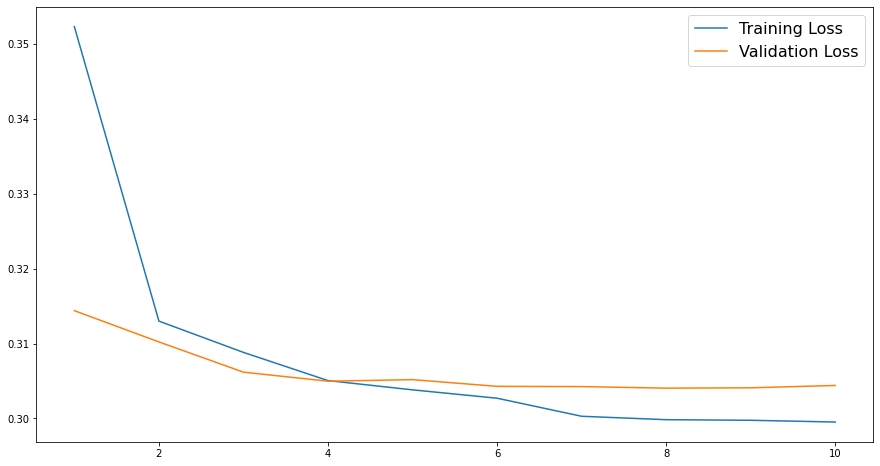

In [26]:
# Learning Curves
plt.figure(figsize=(15,8))

plt.plot(np.arange(1,epochs+1), history_lr_piece.history['loss'], label='Training Loss')
plt.plot(np.arange(1,epochs+1), history_lr_piece.history['val_loss'], label='Validation Loss')

plt.legend(fontsize=16)
plt.show()

**<font color='blue'>2.a. Do the same with an exponential learning rate scheduler.<br> Compare the results.<br>2.b. Display the learning curves.**

In [24]:
tf.keras.backend.clear_session()
reset_seeds()

epochs=10
batch_size=32

# Architecture
inputs = tf.keras.Input((X_train_t.shape[1],))
dense_1 = tf.keras.layers.Dense(16, activation='relu')(inputs)
dense_2 = tf.keras.layers.Dense(16, activation='relu')(dense_1)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense_2)
model_lr_exp = tf.keras.Model(inputs=inputs, outputs=outputs)

# Learning Rate scheduler
step_per_epoch = int(len(X_train_t.todense())/batch_size)
exp_lr = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01,
                                                        decay_rate=0.5,
                                                        decay_steps=step_per_epoch)

# Compiling
model_lr_exp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=exp_lr),
                     loss=tf.keras.losses.BinaryCrossentropy(),
                     metrics=['Accuracy'])

# Training
history_lr_exp = model_lr_exp.fit(X_train_t, y_train_t,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  validation_data=(X_val_t, y_val_t),
                                  callbacks=[printlr])

Learning rate for epoch 1 is 0.010000
Epoch 1/10
1069/1069 [==============================] - 9s 7ms/step - loss: 0.3256 - Accuracy: 0.8469 - val_loss: 0.3083 - val_Accuracy: 0.8588
Learning rate for epoch 2 is 0.005000
Epoch 2/10
1069/1069 [==============================] - 5s 4ms/step - loss: 0.3080 - Accuracy: 0.8551 - val_loss: 0.3056 - val_Accuracy: 0.8618
Learning rate for epoch 3 is 0.002498
Epoch 3/10
1069/1069 [==============================] - 5s 4ms/step - loss: 0.3023 - Accuracy: 0.8582 - val_loss: 0.3046 - val_Accuracy: 0.8626
Learning rate for epoch 4 is 0.001248
Epoch 4/10
1069/1069 [==============================] - 4s 4ms/step - loss: 0.2989 - Accuracy: 0.8602 - val_loss: 0.3032 - val_Accuracy: 0.8628
Learning rate for epoch 5 is 0.000624
Epoch 5/10
1069/1069 [==============================] - 5s 4ms/step - loss: 0.2968 - Accuracy: 0.8608 - val_loss: 0.3032 - val_Accuracy: 0.8631
Learning rate for epoch 6 is 0.000312
Epoch 6/10
1069/1069 [==============================

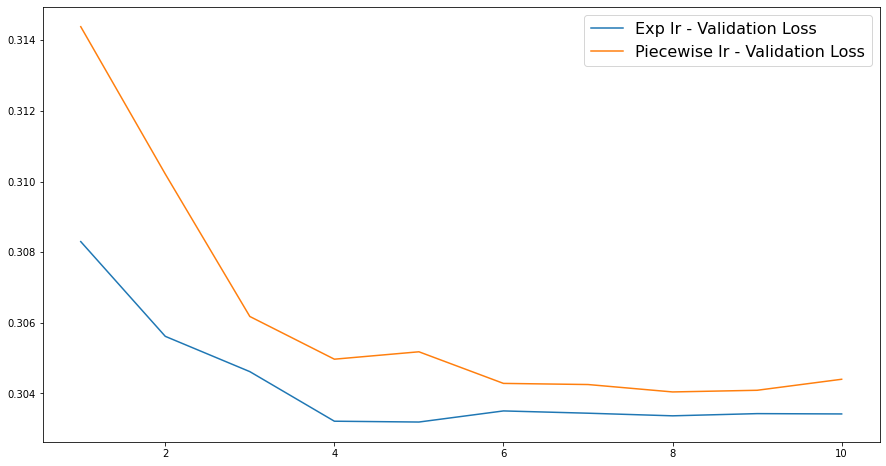

In [27]:
# Learning Curves
plt.figure(figsize=(15,8))

plt.plot(np.arange(1,epochs+1), history_lr_exp.history['val_loss'], label='Exp lr - Validation Loss')
plt.plot(np.arange(1,epochs+1), history_lr_piece.history['val_loss'], label='Piecewise lr - Validation Loss')

plt.legend(fontsize=16)
plt.show()

**<font color='blue'>3. Do the same with a performance learning rate scheduler.<br> Compare the results.**

In [33]:
tf.keras.backend.clear_session()
reset_seeds()

epochs=10
batch_size=32

# Architecture
inputs = tf.keras.Input((X_train_t.shape[1],))
dense_1 = tf.keras.layers.Dense(16, activation='relu')(inputs)
dense_2 = tf.keras.layers.Dense(16, activation='relu')(dense_1)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense_2)
model_lr_perf = tf.keras.Model(inputs=inputs, outputs=outputs)

# Early Stopping
# early = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

# Learning Rate scheduler
perf_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                               patience=1)

# Compiling
model_lr_perf.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                      loss=tf.keras.losses.BinaryCrossentropy(),
                      metrics=['Accuracy'])

# Training
history_lr_perf = model_lr_perf.fit(X_train_t, y_train_t,
                                    epochs=epochs,
                                    batch_size=batch_size,
                                    validation_data=(X_val_t, y_val_t),
                                    callbacks=[perf_lr])

Epoch 1/10
1069/1069 [==============================] - 9s 7ms/step - loss: 0.3284 - Accuracy: 0.8447 - val_loss: 0.3069 - val_Accuracy: 0.8596 - lr: 0.0050
Epoch 2/10
1069/1069 [==============================] - 4s 4ms/step - loss: 0.3105 - Accuracy: 0.8540 - val_loss: 0.3064 - val_Accuracy: 0.8610 - lr: 0.0050
Epoch 3/10
1069/1069 [==============================] - 5s 4ms/step - loss: 0.3061 - Accuracy: 0.8569 - val_loss: 0.3025 - val_Accuracy: 0.8606 - lr: 0.0050
Epoch 4/10
1069/1069 [==============================] - 4s 4ms/step - loss: 0.3033 - Accuracy: 0.8578 - val_loss: 0.3050 - val_Accuracy: 0.8622 - lr: 0.0050
Epoch 5/10
1069/1069 [==============================] - 4s 4ms/step - loss: 0.2939 - Accuracy: 0.8623 - val_loss: 0.3022 - val_Accuracy: 0.8628 - lr: 5.0000e-04
Epoch 6/10
1069/1069 [==============================] - 4s 4ms/step - loss: 0.2922 - Accuracy: 0.8633 - val_loss: 0.3021 - val_Accuracy: 0.8645 - lr: 5.0000e-04
Epoch 7/10
1069/1069 [============================

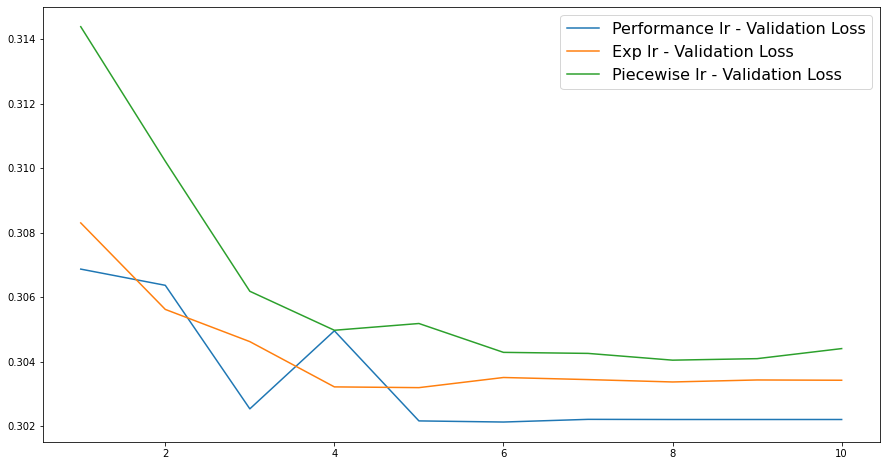

In [36]:
# Learning Curves
plt.figure(figsize=(15,8))

plt.plot(np.arange(1,11), history_lr_perf.history['val_loss'], label='Performance lr - Validation Loss')
plt.plot(np.arange(1,11), history_lr_exp.history['val_loss'], label='Exp lr - Validation Loss')
plt.plot(np.arange(1,11), history_lr_piece.history['val_loss'], label='Piecewise lr - Validation Loss')

plt.legend(fontsize=16)
plt.show()

# Hyperparametrization

There are several Python libraries available for tuning the hyperparameters of a neural network including:
* Keras Tuner - [Documentation](https://keras.io/keras_tuner/)
* Optuna - [Documentation](https://optuna.readthedocs.io/en/stable/index.html)
* Ray Tune - [Documentation](https://docs.ray.io/en/latest/tune/index.html)
* Hyperopt - [Documentation](http://hyperopt.github.io/hyperopt/)

These libraries have similar APIs and can be used in a similar way. Here's a general method for using these libraries for hyperparameter tuning:

* **Define the search space**: *The first step is to define the search space for your hyperparameters. This includes specifying the range of values that each hyperparameter can take. For example, you can define a search space that includes the learning rate, number of hidden layers, batch size, and other hyperparameters.*

* **Define the objective function**: *The next step is to define the objective function that you want to optimize. This is typically the performance metric of your model, such as accuracy or loss. You'll need to train and evaluate your model for each combination of hyperparameters and return the performance metric.*

* **Choose a search algorithm**: *Next, you'll need to choose a search algorithm to explore the search space and find the optimal hyperparameters. The available algorithms vary depending on the library you choose, but popular choices include random search, grid search, Bayesian optimization, and other techniques.*

* **Run the search**: *Once you've defined the search space, objective function, and search algorithm, you can start the search. The library will run multiple experiments, each with a different set of hyperparameters, and evaluate the performance of your model. After several iterations, the library will converge on the optimal set of hyperparameters.*

* **Evaluate the best model**: *Finally, once the search is complete, you can evaluate the performance of the best model using the optimal hyperparameters.*

**<font color='blue'>Using one of these library, find the best hyperparameters for the `adult.csv` dataset.**

*Tips: You should try different combinations of number of hidden layers, number of neurons, activation functions, weight initialization, optimizer, learning rate, batch size, regularization techniques (norms, dropout, batch ..) and so on. <br> You can also treat your preprocessing choices as hyperparameters !*

In [3]:
!pip install -q ray
!pip install -q hpbandster 
!pip install -q ConfigSpace
from ray import tune
from ray.tune.schedulers import HyperBandForBOHB
from ray.tune.search.bohb import TuneBOHB

Tune Ray provides a set of random distribution APIs that allow users to sample hyperparameters from various probability distributions:


*  `tune.randint`: Samples uniformly from integers in a range [low, high).

* `tune.qrandint`: Samples uniformly from integers in a range [low, high] with a user-specified step size.

* `tune.lograndint`: Samples from a log-uniform distribution over integers. The distribution is uniform in the logarithm of the parameter. This is useful for sampling hyperparameters that are exponentially distributed, such as the number of hidden units in a neural network.

* `tune.qlograndint`: Samples from a log-uniform distribution over integers with a user-specified step size.

* `tune.uniform`: Samples uniformly from a continuous range [low, high).

* `tune.quniform`: Samples uniformly from a range [low, high], with a user-specified step size.

* `tune.loguniform`: Samples from a log-uniform distribution, which is uniform in the logarithm of the parameter. This is useful for sampling hyperparameters that are exponentially distributed, such as learning rates.

*  `tune.qloguniform`: Samples from a log-uniform distribution with a user-specified step size.

* `tune.choice`: Samples from a discrete set of values.

In [4]:
config = {
    "learning_rate": tune.loguniform(1e-4, 1e-1),
    "num_hidden_layers": tune.randint(lower=1, upper=6), # 1 2 3 4 5
    "num_units": tune.choice([2, 4, 8, 16, 32, 64]),   
    "batch_size": tune.choice([8, 16, 32]), 
    "activation": tune.choice(['relu', 'leaky_relu', 'elu']),
    "batch_normalization": tune.choice([True,False])
}

Let's create a function that load and prepare the dataset.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

def load_and_preprocess(path):
    # Load & split
    df = pd.read_csv(path).dropna()
    X = df.copy()
    y = X.pop('income')
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.1/(1-0.2),stratify=y_train,random_state=42)

    # Preprocessing
    ohe = OneHotEncoder(drop='if_binary', handle_unknown='ignore')
    std = StandardScaler()
    lbe = LabelEncoder()

    cat_col = X_train.select_dtypes(include='object').columns
    cat_col = np.concatenate([cat_col, np.array(['educational-num'])], axis=-1)
    num_col = X_train.drop(columns=cat_col).columns

    ct = ColumnTransformer([('cat', ohe, cat_col),
                            ('num', std, num_col)])

    X_train_t = ct.fit_transform(X_train)
    X_val_t = ct.transform(X_val)
    X_test_t = ct.transform(X_test)

    y_train_t = lbe.fit_transform(y_train)
    y_val_t = lbe.transform(y_val)
    y_test_t = lbe.transform(y_test)

    return X_train_t.todense(), y_train_t, X_val_t.todense(), y_val_t, X_test_t.todense(), y_test_t

In Ray Tune, we need to create a function that create, compile and train the model given the hyperparameters sampled in the search space.

In [6]:
def train_model(config):
    X_train, y_train, X_val, y_val, X_test, y_test = load_and_preprocess('/content/drive/MyDrive/Cours/Deep Learning/Exercices/Datasets/adult.csv')

    activation = config["activation"]
    units = config["num_units"]
    bn = config['batch_normalization']

    # Create model
    model = tf.keras.Sequential()
    model.add(tf.keras.Input((X_train.shape[1],)))

    for i in range(config["num_hidden_layers"]):
        model.add(tf.keras.layers.Dense(units=units))
        if bn :
            model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Activation(activation))
        
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=config['learning_rate']),
                  loss=tf.keras.losses.BinaryCrossentropy())

    # Train model
    model.fit(X_train,
              y_train,
              batch_size=config["batch_size"],
              epochs=10,
              validation_data=(X_val, y_val))

    # Get comparison metric
    loss = model.evaluate(X_val, y_val)

    return {"loss": loss}

To run the hyperparametrization algorithm, we need to specify at least:


*   the **training function** and the **resources used** (here CPU and GPU)
*   the **hyperparametrization config** that includes the mode (*Determines whether objective is minimizing or maximizing the metric attribute.*), the scheduler (*the algorithm used to search the best hyperparameters*), the searching algorithm and the number of samples (*Number of times to sample from the hyperparameter space.*).
*   the **hyperparameter space**

In [15]:
bohb = TuneBOHB(metric="loss",
                mode="min")
hype = HyperBandForBOHB(time_attr="training_iteration",
                        metric="loss",
                        mode="min",
                        max_t=100)
results = tune.run(train_model,
                   config=config,
                   search_alg=bohb,
                   scheduler=hype,
                   num_samples=20)

2023-03-12 11:25:04,161	WARNING callback.py:108 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`


(pid=69528) 2023-03-12 11:25:07.222699: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
(pid=69528) 2023-03-12 11:25:07.222806: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
(pid=69528) 2023-03-12 11:25:07.222820: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
(train_model pid=69528) 2023-03-12 11:25:10.166220: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_v

(train_model pid=69528) Epoch 1/10
4274/4274 [==============================] - 19s 4ms/step - loss: 0.4678 - val_loss: 0.3385
(train_model pid=69528) Epoch 2/10
4274/4274 [==============================] - 16s 4ms/step - loss: 0.3611 - val_loss: 0.3214
(train_model pid=69528) Epoch 3/10
4274/4274 [==============================] - 16s 4ms/step - loss: 0.3536 - val_loss: 0.3188
(train_model pid=69528) Epoch 4/10
4274/4274 [==============================] - 16s 4ms/step - loss: 0.3491 - val_loss: 0.3168
(train_model pid=69528) Epoch 5/10
4274/4274 [==============================] - 16s 4ms/step - loss: 0.3469 - val_loss: 0.3148
(train_model pid=69528) Epoch 6/10
4274/4274 [==============================] - 16s 4ms/step - loss: 0.3440 - val_loss: 0.3162
(train_model pid=69528) Epoch 7/10
4274/4274 [==============================] - 16s 4ms/step - loss: 0.3441 - val_loss: 0.3152
(train_model pid=69528) Epoch 8/10
4274/4274 [==============================] - 16s 4ms/step - loss: 0.3417 - v

Trial name,date,done,episodes_total,experiment_id,experiment_tag,hostname,iterations_since_restore,loss,node_ip,pid,time_since_restore,time_this_iter_s,time_total_s,timestamp,timesteps_since_restore,timesteps_total,training_iteration,trial_id,warmup_time
train_model_00564da1,2023-03-12_12-11-14,True,0,9f39e3d6f404471bbfa9d9e89f5f22ae,"7_activation=relu,batch_normalization=True,batch_size=8,learning_rate=0.0046,num_hidden_layers=4,num_units=4",d27c44fba61d,1,0.346529,172.28.0.12,69528,233.128,233.128,463.915,1678623074,0,0,1,00564da1,0.003613
train_model_03138c3f,2023-03-12_12-04-58,True,0,9f39e3d6f404471bbfa9d9e89f5f22ae,"5_activation=leaky_relu,batch_normalization=True,batch_size=32,learning_rate=0.0781,num_hidden_layers=3,num_units=4",d27c44fba61d,1,0.355815,172.28.0.12,69528,53.0997,53.0997,105.271,1678622698,0,0,1,03138c3f,0.003613
train_model_04b2187a,2023-03-12_12-27-12,True,0,9f39e3d6f404471bbfa9d9e89f5f22ae,"18_activation=leaky_relu,batch_normalization=False,batch_size=32,learning_rate=0.0036,num_hidden_layers=4,num_units=4",d27c44fba61d,1,0.30886,172.28.0.12,69528,36.0365,36.0365,72.0606,1678624032,0,0,1,04b2187a,0.003613
train_model_190669da,2023-03-12_12-03-31,True,0,9f39e3d6f404471bbfa9d9e89f5f22ae,"3_activation=leaky_relu,batch_normalization=True,batch_size=16,learning_rate=0.0001,num_hidden_layers=3,num_units=4",d27c44fba61d,1,0.329257,172.28.0.12,69528,102.734,102.734,203.064,1678622611,0,0,1,190669da,0.003613
train_model_1c571b53,2023-03-12_12-14-39,True,0,9f39e3d6f404471bbfa9d9e89f5f22ae,"9_activation=elu,batch_normalization=False,batch_size=16,learning_rate=0.0001,num_hidden_layers=5,num_units=64",d27c44fba61d,1,0.305936,172.28.0.12,69528,73.5943,73.5943,146.409,1678623279,0,0,1,1c571b53,0.003613
train_model_4455730f,2023-03-12_12-29-48,True,0,9f39e3d6f404471bbfa9d9e89f5f22ae,"20_activation=elu,batch_normalization=True,batch_size=16,learning_rate=0.0017,num_hidden_layers=3,num_units=32",d27c44fba61d,1,0.307597,172.28.0.12,69528,102.813,102.813,204.459,1678624188,0,0,1,4455730f,0.003613
train_model_51ede594,2023-03-12_12-17-28,True,0,9f39e3d6f404471bbfa9d9e89f5f22ae,"12_activation=elu,batch_normalization=False,batch_size=32,learning_rate=0.0214,num_hidden_layers=4,num_units=8",d27c44fba61d,1,0.318667,172.28.0.12,69528,35.79,35.79,71.0523,1678623448,0,0,1,51ede594,0.003613
train_model_5a7523fc,2023-03-12_12-18-28,True,0,9f39e3d6f404471bbfa9d9e89f5f22ae,"13_activation=relu,batch_normalization=False,batch_size=16,learning_rate=0.0006,num_hidden_layers=2,num_units=2",d27c44fba61d,1,0.316296,172.28.0.12,69528,59.3912,59.3912,118.35,1678623508,0,0,1,5a7523fc,0.003613
train_model_613b9467,2023-03-12_12-25-58,True,0,9f39e3d6f404471bbfa9d9e89f5f22ae,"16_activation=leaky_relu,batch_normalization=True,batch_size=8,learning_rate=0.0015,num_hidden_layers=3,num_units=32",d27c44fba61d,1,0.320277,172.28.0.12,69528,199.523,199.523,399.086,1678623958,0,0,1,613b9467,0.003613
train_model_78fffed9,2023-03-12_12-22-38,True,0,9f39e3d6f404471bbfa9d9e89f5f22ae,"15_activation=elu,batch_normalization=False,batch_size=8,learning_rate=0.0009,num_hidden_layers=3,num_units=4",d27c44fba61d,1,0.307736,172.28.0.12,69528,125.918,125.918,251.291,1678623758,0,0,1,78fffed9,0.003613


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
4274/4274 [==============================] - 12s 3ms/step - loss: 0.3140 - val_loss: 0.3134
(train_model pid=69528) Epoch 4/10
4274/4274 [==============================] - 12s 3ms/step - loss: 0.3119 - val_loss: 0.3075
(train_model pid=69528) Epoch 5/10
4274/4274 [==============================] - 12s 3ms/step - loss: 0.3105 - val_loss: 0.3089
(train_model pid=69528) Epoch 6/10
4274/4274 [==============================] - 12s 3ms/step - loss: 0.3095 - val_loss: 0.3078
(train_model pid=69528) Epoch 7/10
4274/4274 [==============================] - 12s 3ms/step - loss: 0.3083 - val_loss: 0.3063
(train_model pid=69528) Epoch 8/10
4274/4274 [==============================] - 12s 3ms/step - loss: 0.3076 - val_loss: 0.3067
(train_model pid=69528) Epoch 9/10
4274/4274 [==============================] - 12s 3ms/step - loss: 0.3070 - val_loss: 0.3064
(train_model pid=69528) Epoch 10/10
153/153 [=======================

(train_model pid=69528) 2023-03-12 11:57:20,013	INFO trainable.py:791 -- Restored on 172.28.0.12 from checkpoint: /root/ray_results/train_model_2023-03-12_11-25-04/train_model_84351ca2_1_activation=elu,batch_normalization=True,batch_size=8,learning_rate=0.0001,num_hidden_layers=2,num_units=32_2023-03-12_11-25-04/checkpoint_tmp65839e
(train_model pid=69528) 2023-03-12 11:57:20,013	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 0, '_timesteps_total': 0, '_time_total': 164.40437865257263, '_episodes_total': 0}


(train_model pid=69528) Epoch 1/10
4274/4274 [==============================] - 18s 4ms/step - loss: 0.4358 - val_loss: 0.3338
(train_model pid=69528) Epoch 2/10
4274/4274 [==============================] - 16s 4ms/step - loss: 0.3627 - val_loss: 0.3203
(train_model pid=69528) Epoch 3/10
4274/4274 [==============================] - 16s 4ms/step - loss: 0.3566 - val_loss: 0.3167
(train_model pid=69528) Epoch 4/10
4274/4274 [==============================] - 16s 4ms/step - loss: 0.3493 - val_loss: 0.3167
(train_model pid=69528) Epoch 5/10
4274/4274 [==============================] - 16s 4ms/step - loss: 0.3477 - val_loss: 0.3152
(train_model pid=69528) Epoch 6/10
4274/4274 [==============================] - 16s 4ms/step - loss: 0.3443 - val_loss: 0.3140
(train_model pid=69528) Epoch 7/10
4274/4274 [==============================] - 16s 4ms/step - loss: 0.3392 - val_loss: 0.3112
(train_model pid=69528) Epoch 8/10
4274/4274 [==============================] - 16s 4ms/step - loss: 0.3398 - v

2023-03-12 12:00:05,321	INFO hyperband.py:472 -- Restoring from a previous point in time. Previous=1; Now=1


153/153 [==============================] - 0s 2ms/step - loss: 0.3096


(train_model pid=69528) 2023-03-12 12:00:05,351	INFO trainable.py:791 -- Restored on 172.28.0.12 from checkpoint: /root/ray_results/train_model_2023-03-12_11-25-04/train_model_cc1a6a11_2_activation=relu,batch_normalization=True,batch_size=16,learning_rate=0.0068,num_hidden_layers=3,num_units=6_2023-03-12_11-27-52/checkpoint_tmp241ac0
(train_model pid=69528) 2023-03-12 12:00:05,351	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 0, '_timesteps_total': 0, '_time_total': 99.10061430931091, '_episodes_total': 0}


(train_model pid=69528) Epoch 1/10
2137/2137 [==============================] - 13s 5ms/step - loss: 0.3488 - val_loss: 0.3236
(train_model pid=69528) Epoch 2/10
2137/2137 [==============================] - 10s 5ms/step - loss: 0.3320 - val_loss: 0.3180
(train_model pid=69528) Epoch 3/10
2137/2137 [==============================] - 10s 5ms/step - loss: 0.3246 - val_loss: 0.3127
(train_model pid=69528) Epoch 4/10
2137/2137 [==============================] - 10s 5ms/step - loss: 0.3224 - val_loss: 0.3203
(train_model pid=69528) Epoch 5/10
2137/2137 [==============================] - 10s 5ms/step - loss: 0.3173 - val_loss: 0.3137
(train_model pid=69528) Epoch 6/10
2137/2137 [==============================] - 10s 5ms/step - loss: 0.3148 - val_loss: 0.3114
(train_model pid=69528) Epoch 7/10
2137/2137 [==============================] - 10s 5ms/step - loss: 0.3124 - val_loss: 0.3115
(train_model pid=69528) Epoch 8/10
2137/2137 [==============================] - 10s 5ms/step - loss: 0.3104 - v

2023-03-12 12:01:48,804	INFO hyperband.py:472 -- Restoring from a previous point in time. Previous=1; Now=1


153/153 [==============================] - 0s 2ms/step - loss: 0.3094


(train_model pid=69528) 2023-03-12 12:01:48,837	INFO trainable.py:791 -- Restored on 172.28.0.12 from checkpoint: /root/ray_results/train_model_2023-03-12_11-25-04/train_model_190669da_3_activation=leaky_relu,batch_normalization=True,batch_size=16,learning_rate=0.0001,num_hidden_layers=3,num_u_2023-03-12_11-29-32/checkpoint_tmp175f9e
(train_model pid=69528) 2023-03-12 12:01:48,837	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 0, '_timesteps_total': 0, '_time_total': 100.33081197738647, '_episodes_total': 0}


(train_model pid=69528) Epoch 1/10
2137/2137 [==============================] - 13s 5ms/step - loss: 0.6046 - val_loss: 0.4743
(train_model pid=69528) Epoch 2/10
2137/2137 [==============================] - 10s 5ms/step - loss: 0.4358 - val_loss: 0.3803
(train_model pid=69528) Epoch 3/10
2137/2137 [==============================] - 10s 5ms/step - loss: 0.3779 - val_loss: 0.3518
(train_model pid=69528) Epoch 4/10
2137/2137 [==============================] - 10s 5ms/step - loss: 0.3592 - val_loss: 0.3402
(train_model pid=69528) Epoch 5/10
2137/2137 [==============================] - 10s 5ms/step - loss: 0.3555 - val_loss: 0.3324
(train_model pid=69528) Epoch 6/10
2137/2137 [==============================] - 10s 5ms/step - loss: 0.3503 - val_loss: 0.3349
(train_model pid=69528) Epoch 7/10
2137/2137 [==============================] - 10s 5ms/step - loss: 0.3493 - val_loss: 0.3329
(train_model pid=69528) Epoch 8/10
2137/2137 [==============================] - 10s 5ms/step - loss: 0.3478 - v

2023-03-12 12:03:31,573	INFO hyperband.py:472 -- Restoring from a previous point in time. Previous=1; Now=1


131/153 [========================>.....] - ETA: 0s - loss: 0.3267


(train_model pid=69528) 2023-03-12 12:03:31,603	INFO trainable.py:791 -- Restored on 172.28.0.12 from checkpoint: /root/ray_results/train_model_2023-03-12_11-25-04/train_model_e2689ce5_4_activation=relu,batch_normalization=False,batch_size=32,learning_rate=0.0777,num_hidden_layers=3,num_units=_2023-03-12_11-31-12/checkpoint_tmp1fd72f
(train_model pid=69528) 2023-03-12 12:03:31,603	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 0, '_timesteps_total': 0, '_time_total': 32.830596685409546, '_episodes_total': 0}


153/153 [==============================] - 0s 2ms/step - loss: 0.3293
(train_model pid=69528) Epoch 1/10
1069/1069 [==============================] - 5s 3ms/step - loss: 0.3537 - val_loss: 0.4137
(train_model pid=69528) Epoch 2/10
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3415 - val_loss: 0.3445
(train_model pid=69528) Epoch 3/10
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3467 - val_loss: 0.3666
(train_model pid=69528) Epoch 4/10
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3427 - val_loss: 0.3543
(train_model pid=69528) Epoch 5/10
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3407 - val_loss: 0.3648
(train_model pid=69528) Epoch 6/10
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3425 - val_loss: 0.3640
(train_model pid=69528) Epoch 7/10
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3397 - val_loss: 0.3684
(train_model pid=69528) Epoch 8/10
1069/1069 [==

2023-03-12 12:04:04,946	INFO hyperband.py:472 -- Restoring from a previous point in time. Previous=1; Now=1


153/153 [==============================] - 0s 2ms/step - loss: 0.3280


(train_model pid=69528) 2023-03-12 12:04:04,977	INFO trainable.py:791 -- Restored on 172.28.0.12 from checkpoint: /root/ray_results/train_model_2023-03-12_11-25-04/train_model_03138c3f_5_activation=leaky_relu,batch_normalization=True,batch_size=32,learning_rate=0.0781,num_hidden_layers=3,num_u_2023-03-12_11-31-45/checkpoint_tmp1c3910
(train_model pid=69528) 2023-03-12 12:04:04,977	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 0, '_timesteps_total': 0, '_time_total': 52.17161846160889, '_episodes_total': 0}


(train_model pid=69528) Epoch 1/10
1069/1069 [==============================] - 8s 5ms/step - loss: 0.3531 - val_loss: 0.3457
(train_model pid=69528) Epoch 2/10
1069/1069 [==============================] - 5s 5ms/step - loss: 0.3406 - val_loss: 0.3994
(train_model pid=69528) Epoch 3/10
1069/1069 [==============================] - 5s 5ms/step - loss: 0.3381 - val_loss: 0.3291
(train_model pid=69528) Epoch 4/10
1069/1069 [==============================] - 5s 5ms/step - loss: 0.3362 - val_loss: 0.3751
(train_model pid=69528) Epoch 5/10
1069/1069 [==============================] - 5s 5ms/step - loss: 0.3369 - val_loss: 0.3391
(train_model pid=69528) Epoch 6/10
1069/1069 [==============================] - 5s 5ms/step - loss: 0.3369 - val_loss: 0.3307
(train_model pid=69528) Epoch 7/10
1069/1069 [==============================] - 5s 5ms/step - loss: 0.3343 - val_loss: 0.3228
(train_model pid=69528) Epoch 8/10
1069/1069 [==============================] - 5s 5ms/step - loss: 0.3361 - val_loss:

2023-03-12 12:04:58,079	INFO hyperband.py:472 -- Restoring from a previous point in time. Previous=1; Now=1


153/153 [==============================] - 0s 2ms/step - loss: 0.3558


(train_model pid=69528) 2023-03-12 12:04:58,107	INFO trainable.py:791 -- Restored on 172.28.0.12 from checkpoint: /root/ray_results/train_model_2023-03-12_11-25-04/train_model_cbb6cd55_6_activation=elu,batch_normalization=False,batch_size=8,learning_rate=0.0011,num_hidden_layers=5,num_units=2_2023-03-12_11-32-38/checkpoint_tmp684707
(train_model pid=69528) 2023-03-12 12:04:58,107	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 0, '_timesteps_total': 0, '_time_total': 140.2997591495514, '_episodes_total': 0}


(train_model pid=69528) Epoch 1/10
4274/4274 [==============================] - 16s 3ms/step - loss: 0.3435 - val_loss: 0.3257
(train_model pid=69528) Epoch 2/10
4274/4274 [==============================] - 14s 3ms/step - loss: 0.3200 - val_loss: 0.3193
(train_model pid=69528) Epoch 3/10
4274/4274 [==============================] - 14s 3ms/step - loss: 0.3174 - val_loss: 0.3184
(train_model pid=69528) Epoch 4/10
4274/4274 [==============================] - 14s 3ms/step - loss: 0.3165 - val_loss: 0.3177
(train_model pid=69528) Epoch 5/10
4274/4274 [==============================] - 14s 3ms/step - loss: 0.3159 - val_loss: 0.3147
(train_model pid=69528) Epoch 6/10
4274/4274 [==============================] - 14s 3ms/step - loss: 0.3152 - val_loss: 0.3167
(train_model pid=69528) Epoch 7/10
4274/4274 [==============================] - 14s 3ms/step - loss: 0.3153 - val_loss: 0.3141
(train_model pid=69528) Epoch 8/10
4274/4274 [==============================] - 14s 3ms/step - loss: 0.3145 - v

2023-03-12 12:07:21,197	INFO hyperband.py:472 -- Restoring from a previous point in time. Previous=1; Now=1


118/153 [======================>.......] - ETA: 0s - loss: 0.3099


(train_model pid=69528) 2023-03-12 12:07:21,227	INFO trainable.py:791 -- Restored on 172.28.0.12 from checkpoint: /root/ray_results/train_model_2023-03-12_11-25-04/train_model_00564da1_7_activation=relu,batch_normalization=True,batch_size=8,learning_rate=0.0046,num_hidden_layers=4,num_units=4_2023-03-12_11-34-58/checkpoint_tmpd7e36d
(train_model pid=69528) 2023-03-12 12:07:21,227	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 0, '_timesteps_total': 0, '_time_total': 230.78691411018372, '_episodes_total': 0}


153/153 [==============================] - 0s 2ms/step - loss: 0.3164
(train_model pid=69528) Epoch 1/10
4274/4274 [==============================] - 26s 5ms/step - loss: 0.4018 - val_loss: 0.3747
(train_model pid=69528) Epoch 2/10
4274/4274 [==============================] - 23s 5ms/step - loss: 0.3661 - val_loss: 0.3447
(train_model pid=69528) Epoch 3/10
4274/4274 [==============================] - 23s 5ms/step - loss: 0.3608 - val_loss: 0.3390
(train_model pid=69528) Epoch 4/10
4274/4274 [==============================] - 23s 5ms/step - loss: 0.3548 - val_loss: 0.3356
(train_model pid=69528) Epoch 5/10
4274/4274 [==============================] - 23s 5ms/step - loss: 0.3494 - val_loss: 0.3449
(train_model pid=69528) Epoch 6/10
4274/4274 [==============================] - 23s 5ms/step - loss: 0.3454 - val_loss: 0.3443
(train_model pid=69528) Epoch 7/10
4274/4274 [==============================] - 23s 5ms/step - loss: 0.3476 - val_loss: 0.3409
(train_model pid=69528) Epoch 8/10
4274/4

2023-03-12 12:11:14,357	INFO hyperband.py:472 -- Restoring from a previous point in time. Previous=1; Now=1


153/153 [==============================] - 0s 2ms/step - loss: 0.3465


(train_model pid=69528) 2023-03-12 12:11:14,388	INFO trainable.py:791 -- Restored on 172.28.0.12 from checkpoint: /root/ray_results/train_model_2023-03-12_11-25-04/train_model_9ccd4490_8_activation=relu,batch_normalization=True,batch_size=8,learning_rate=0.0026,num_hidden_layers=1,num_units=64_2023-03-12_11-38-49/checkpoint_tmp258e12
(train_model pid=69528) 2023-03-12 12:11:14,388	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 0, '_timesteps_total': 0, '_time_total': 130.63639307022095, '_episodes_total': 0}


(train_model pid=69528) Epoch 1/10
1426/4274 [=========>....................] - ETA: 8s - loss: 0.3675
1462/4274 [=========
(train_model pid=69528) >....................] - ETA: 8s - loss: 0.3673
4274/4274 [==============================] - 14s 3ms/step - loss: 0.3544 - val_loss: 0.3245
(train_model pid=69528) Epoch 2/10
4274/4274 [==============================] - 13s 3ms/step - loss: 0.3405 - val_loss: 0.3147
(train_model pid=69528) Epoch 3/10
4274/4274 [==============================] - 13s 3ms/step - loss: 0.3347 - val_loss: 0.3156
(train_model pid=69528) Epoch 4/10
4274/4274 [==============================] - 13s 3ms/step - loss: 0.3309 - val_loss: 0.3169
(train_model pid=69528) Epoch 5/10
4274/4274 [==============================] - 13s 3ms/step - loss: 0.3274 - val_loss: 0.3182
(train_model pid=69528) Epoch 6/10
4274/4274 [==============================] - 13s 3ms/step - loss: 0.3243 - val_loss: 0.3214
(train_model pid=69528) Epoch 7/10
4274/4274 [==============================]

2023-03-12 12:13:26,295	INFO hyperband.py:472 -- Restoring from a previous point in time. Previous=1; Now=1


153/153 [==============================] - 0s 2ms/step - loss: 0.3190


(train_model pid=69528) 2023-03-12 12:13:26,324	INFO trainable.py:791 -- Restored on 172.28.0.12 from checkpoint: /root/ray_results/train_model_2023-03-12_11-25-04/train_model_1c571b53_9_activation=elu,batch_normalization=False,batch_size=16,learning_rate=0.0001,num_hidden_layers=5,num_units=6_2023-03-12_11-41-00/checkpoint_tmpf8af9e
(train_model pid=69528) 2023-03-12 12:13:26,325	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 0, '_timesteps_total': 0, '_time_total': 72.81496477127075, '_episodes_total': 0}


(train_model pid=69528) Epoch 1/10
2137/2137 [==============================] - 9s 3ms/step - loss: 0.3428 - val_loss: 0.3134
(train_model pid=69528) Epoch 2/10
2137/2137 [==============================] - 7s 3ms/step - loss: 0.3141 - val_loss: 0.3111
(train_model pid=69528) Epoch 3/10
2137/2137 [==============================] - 7s 3ms/step - loss: 0.3109 - val_loss: 0.3125
(train_model pid=69528) Epoch 4/10
2137/2137 [==============================] - 7s 3ms/step - loss: 0.3090 - val_loss: 0.3103
(train_model pid=69528) Epoch 5/10
2137/2137 [==============================] - 7s 3ms/step - loss: 0.3079 - val_loss: 0.3071
(train_model pid=69528) Epoch 6/10
2137/2137 [==============================] - 7s 3ms/step - loss: 0.3067 - val_loss: 0.3062
(train_model pid=69528) Epoch 7/10
2137/2137 [==============================] - 7s 3ms/step - loss: 0.3055 - val_loss: 0.3050
(train_model pid=69528) Epoch 8/10
2137/2137 [==============================] - 7s 3ms/step - loss: 0.3050 - val_loss:

2023-03-12 12:14:39,921	INFO hyperband.py:472 -- Restoring from a previous point in time. Previous=1; Now=1


153/153 [==============================] - 0s 2ms/step - loss: 0.3059


(train_model pid=69528) 2023-03-12 12:14:39,950	INFO trainable.py:791 -- Restored on 172.28.0.12 from checkpoint: /root/ray_results/train_model_2023-03-12_11-25-04/train_model_c475ce09_10_activation=elu,batch_normalization=False,batch_size=16,learning_rate=0.0631,num_hidden_layers=2,num_units=_2023-03-12_11-42-13/checkpoint_tmp1774d4
(train_model pid=69528) 2023-03-12 12:14:39,950	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 0, '_timesteps_total': 0, '_time_total': 59.39534783363342, '_episodes_total': 0}


(train_model pid=69528) Epoch 1/10
2137/2137 [==============================] - 7s 3ms/step - loss: 0.3454 - val_loss: 0.3294
(train_model pid=69528) Epoch 2/10
2137/2137 [==============================] - 6s 3ms/step - loss: 0.3378 - val_loss: 0.3759
(train_model pid=69528) Epoch 3/10
2137/2137 [==============================] - 6s 3ms/step - loss: 0.3356 - val_loss: 0.3257
(train_model pid=69528) Epoch 4/10
2137/2137 [==============================] - 6s 3ms/step - loss: 0.3378 - val_loss: 0.3464
(train_model pid=69528) Epoch 5/10
2137/2137 [==============================] - 6s 3ms/step - loss: 0.3371 - val_loss: 0.3350
(train_model pid=69528) Epoch 6/10
2137/2137 [==============================] - 6s 3ms/step - loss: 0.3358 - val_loss: 0.3349
(train_model pid=69528) Epoch 7/10
2137/2137 [==============================] - 6s 3ms/step - loss: 0.3363 - val_loss: 0.3263
(train_model pid=69528) Epoch 8/10
2137/2137 [==============================] - 6s 3ms/step - loss: 0.3374 - val_loss:

2023-03-12 12:15:39,336	INFO hyperband.py:472 -- Restoring from a previous point in time. Previous=1; Now=1


153/153 [==============================] - 0s 2ms/step - loss: 0.3355


(train_model pid=69528) 2023-03-12 12:15:39,365	INFO trainable.py:791 -- Restored on 172.28.0.12 from checkpoint: /root/ray_results/train_model_2023-03-12_11-25-04/train_model_914dbb16_11_activation=elu,batch_normalization=False,batch_size=16,learning_rate=0.0024,num_hidden_layers=5,num_units=_2023-03-12_11-43-13/checkpoint_tmpe1222c
(train_model pid=69528) 2023-03-12 12:15:39,365	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 0, '_timesteps_total': 0, '_time_total': 72.89222812652588, '_episodes_total': 0}


(train_model pid=69528) Epoch 1/10
2137/2137 [==============================] - 9s 3ms/step - loss: 0.3573 - val_loss: 0.3291
(train_model pid=69528) Epoch 2/10
2137/2137 [==============================] - 7s 3ms/step - loss: 0.3251 - val_loss: 0.3328
(train_model pid=69528) Epoch 3/10
2137/2137 [==============================] - 7s 3ms/step - loss: 0.3229 - val_loss: 0.3254
(train_model pid=69528) Epoch 4/10
2137/2137 [==============================] - 7s 3ms/step - loss: 0.3215 - val_loss: 0.3214
(train_model pid=69528) Epoch 5/10
2137/2137 [==============================] - 7s 3ms/step - loss: 0.3205 - val_loss: 0.3200
(train_model pid=69528) Epoch 6/10
2137/2137 [==============================] - 7s 3ms/step - loss: 0.3189 - val_loss: 0.3181
(train_model pid=69528) Epoch 7/10
2137/2137 [==============================] - 7s 3ms/step - loss: 0.3179 - val_loss: 0.3211
(train_model pid=69528) Epoch 8/10
2137/2137 [==============================] - 7s 3ms/step - loss: 0.3174 - val_loss:

2023-03-12 12:16:52,838	INFO hyperband.py:472 -- Restoring from a previous point in time. Previous=1; Now=1


153/153 [==============================] - 0s 2ms/step - loss: 0.3216


(train_model pid=69528) 2023-03-12 12:16:52,869	INFO trainable.py:791 -- Restored on 172.28.0.12 from checkpoint: /root/ray_results/train_model_2023-03-12_11-25-04/train_model_51ede594_12_activation=elu,batch_normalization=False,batch_size=32,learning_rate=0.0214,num_hidden_layers=4,num_units=_2023-03-12_11-44-26/checkpoint_tmpbfccdc
(train_model pid=69528) 2023-03-12 12:16:52,869	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 0, '_timesteps_total': 0, '_time_total': 35.26226091384888, '_episodes_total': 0}


(train_model pid=69528) Epoch 1/10
1069/1069 [==============================] - 5s 3ms/step - loss: 0.3364 - val_loss: 0.3144
(train_model pid=69528) Epoch 2/10
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3203 - val_loss: 0.3128
(train_model pid=69528) Epoch 3/10
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3165 - val_loss: 0.3152
(train_model pid=69528) Epoch 4/10
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3169 - val_loss: 0.3241
(train_model pid=69528) Epoch 5/10
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3160 - val_loss: 0.3317
(train_model pid=69528) Epoch 6/10
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3141 - val_loss: 0.3135
(train_model pid=69528) Epoch 7/10
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3142 - val_loss: 0.3262
(train_model pid=69528) Epoch 8/10
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3121 - val_loss:

2023-03-12 12:17:28,661	INFO hyperband.py:472 -- Restoring from a previous point in time. Previous=1; Now=1


153/153 [==============================] - 0s 2ms/step - loss: 0.3187


(train_model pid=69528) 2023-03-12 12:17:28,692	INFO trainable.py:791 -- Restored on 172.28.0.12 from checkpoint: /root/ray_results/train_model_2023-03-12_11-25-04/train_model_5a7523fc_13_activation=relu,batch_normalization=False,batch_size=16,learning_rate=0.0006,num_hidden_layers=2,num_units_2023-03-12_11-45-01/checkpoint_tmpfac55d
(train_model pid=69528) 2023-03-12 12:17:28,692	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 0, '_timesteps_total': 0, '_time_total': 58.95906114578247, '_episodes_total': 0}


(train_model pid=69528) Epoch 1/10
2137/2137 [==============================] - 7s 3ms/step - loss: 0.5593 - val_loss: 0.4525
(train_model pid=69528) Epoch 2/10
2137/2137 [==============================] - 6s 3ms/step - loss: 0.4068 - val_loss: 0.3723
(train_model pid=69528) Epoch 3/10
2137/2137 [==============================] - 6s 3ms/step - loss: 0.3579 - val_loss: 0.3457
(train_model pid=69528) Epoch 4/10
2137/2137 [==============================] - 6s 3ms/step - loss: 0.3400 - val_loss: 0.3335
(train_model pid=69528) Epoch 5/10
2137/2137 [==============================] - 6s 3ms/step - loss: 0.3318 - val_loss: 0.3281
(train_model pid=69528) Epoch 6/10
2137/2137 [==============================] - 6s 3ms/step - loss: 0.3273 - val_loss: 0.3240
(train_model pid=69528) Epoch 7/10
2137/2137 [==============================] - 6s 3ms/step - loss: 0.3237 - val_loss: 0.3216
(train_model pid=69528) Epoch 8/10
2137/2137 [==============================] - 6s 3ms/step - loss: 0.3212 - val_loss:

2023-03-12 12:18:28,085	INFO hyperband.py:472 -- Restoring from a previous point in time. Previous=1; Now=1


153/153 [==============================] - 0s 2ms/step - loss: 0.3163


(train_model pid=69528) 2023-03-12 12:18:28,117	INFO trainable.py:791 -- Restored on 172.28.0.12 from checkpoint: /root/ray_results/train_model_2023-03-12_11-25-04/train_model_a48de587_14_activation=leaky_relu,batch_normalization=False,batch_size=8,learning_rate=0.0082,num_hidden_layers=3,num__2023-03-12_11-46-00/checkpoint_tmp59b499
(train_model pid=69528) 2023-03-12 12:18:28,117	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 0, '_timesteps_total': 0, '_time_total': 124.41612672805786, '_episodes_total': 0}


(train_model pid=69528) Epoch 1/10
4274/4274 [==============================] - 14s 3ms/step - loss: 0.3313 - val_loss: 0.3383
(train_model pid=69528) Epoch 2/10
4274/4274 [==============================] - 12s 3ms/step - loss: 0.3216 - val_loss: 0.3156
(train_model pid=69528) Epoch 3/10
4274/4274 [==============================] - 12s 3ms/step - loss: 0.3174 - val_loss: 0.3128
(train_model pid=69528) Epoch 4/10
4274/4274 [==============================] - 12s 3ms/step - loss: 0.3173 - val_loss: 0.3169
(train_model pid=69528) Epoch 5/10
4274/4274 [==============================] - 12s 3ms/step - loss: 0.3145 - val_loss: 0.3216
(train_model pid=69528) Epoch 6/10
4274/4274 [==============================] - 12s 3ms/step - loss: 0.3139 - val_loss: 0.3108
(train_model pid=69528) Epoch 7/10
4274/4274 [==============================] - 12s 3ms/step - loss: 0.3158 - val_loss: 0.3149
(train_model pid=69528) Epoch 8/10
4274/4274 [==============================] - 12s 3ms/step - loss: 0.3118 - v

2023-03-12 12:20:32,848	INFO hyperband.py:472 -- Restoring from a previous point in time. Previous=1; Now=1


153/153 [==============================] - 0s 2ms/step - loss: 0.3258


(train_model pid=69528) 2023-03-12 12:20:32,880	INFO trainable.py:791 -- Restored on 172.28.0.12 from checkpoint: /root/ray_results/train_model_2023-03-12_11-25-04/train_model_78fffed9_15_activation=elu,batch_normalization=False,batch_size=8,learning_rate=0.0009,num_hidden_layers=3,num_units=4_2023-03-12_11-48-05/checkpoint_tmp25e1de
(train_model pid=69528) 2023-03-12 12:20:32,880	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 0, '_timesteps_total': 0, '_time_total': 125.37272262573242, '_episodes_total': 0}


(train_model pid=69528) Epoch 1/10
4274/4274 [==============================] - 14s 3ms/step - loss: 0.3428 - val_loss: 0.3219
(train_model pid=69528) Epoch 2/10
4274/4274 [==============================] - 13s 3ms/step - loss: 0.3178 - val_loss: 0.3141
(train_model pid=69528) Epoch 3/10
4274/4274 [==============================] - 12s 3ms/step - loss: 0.3148 - val_loss: 0.3133
(train_model pid=69528) Epoch 4/10
4274/4274 [==============================] - 12s 3ms/step - loss: 0.3134 - val_loss: 0.3123
(train_model pid=69528) Epoch 5/10
4274/4274 [==============================] - 12s 3ms/step - loss: 0.3127 - val_loss: 0.3118
(train_model pid=69528) Epoch 6/10
4274/4274 [==============================] - 13s 3ms/step - loss: 0.3119 - val_loss: 0.3107
(train_model pid=69528) Epoch 7/10
4274/4274 [==============================] - 12s 3ms/step - loss: 0.3112 - val_loss: 0.3113
(train_model pid=69528) Epoch 8/10
4274/4274 [==============================] - 12s 3ms/step - loss: 0.3110 - v

2023-03-12 12:22:38,801	INFO hyperband.py:472 -- Restoring from a previous point in time. Previous=1; Now=1


153/153 [==============================] - 0s 2ms/step - loss: 0.3077


(train_model pid=69528) 2023-03-12 12:22:38,830	INFO trainable.py:791 -- Restored on 172.28.0.12 from checkpoint: /root/ray_results/train_model_2023-03-12_11-25-04/train_model_613b9467_16_activation=leaky_relu,batch_normalization=True,batch_size=8,learning_rate=0.0015,num_hidden_layers=3,num_u_2023-03-12_11-50-11/checkpoint_tmpd4ad93
(train_model pid=69528) 2023-03-12 12:22:38,830	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 0, '_timesteps_total': 0, '_time_total': 199.56338477134705, '_episodes_total': 0}


(train_model pid=69528) Epoch 1/10
4274/4274 [==============================] - 22s 5ms/step - loss: 0.3745 - val_loss: 0.3224
(train_model pid=69528) Epoch 2/10
4274/4274 [==============================] - 20s 5ms/step - loss: 0.3473 - val_loss: 0.3210
(train_model pid=69528) Epoch 3/10
4274/4274 [==============================] - 20s 5ms/step - loss: 0.3390 - val_loss: 0.3240
(train_model pid=69528) Epoch 4/10
4274/4274 [==============================] - 20s 5ms/step - loss: 0.3365 - val_loss: 0.3224
(train_model pid=69528) Epoch 5/10
4274/4274 [==============================] - 20s 5ms/step - loss: 0.3291 - val_loss: 0.3144
(train_model pid=69528) Epoch 6/10
4274/4274 [==============================] - 19s 5ms/step - loss: 0.3295 - val_loss: 0.3217
(train_model pid=69528) Epoch 7/10
4274/4274 [==============================] - 20s 5ms/step - loss: 0.3290 - val_loss: 0.3209
(train_model pid=69528) Epoch 8/10
4274/4274 [==============================] - 20s 5ms/step - loss: 0.3259 - v

2023-03-12 12:25:58,355	INFO hyperband.py:472 -- Restoring from a previous point in time. Previous=1; Now=1


153/153 [==============================] - 0s 2ms/step - loss: 0.3203


(train_model pid=69528) 2023-03-12 12:25:58,388	INFO trainable.py:791 -- Restored on 172.28.0.12 from checkpoint: /root/ray_results/train_model_2023-03-12_11-25-04/train_model_af0865f2_17_activation=relu,batch_normalization=False,batch_size=32,learning_rate=0.0381,num_hidden_layers=5,num_units_2023-03-12_11-53-30/checkpoint_tmp47e081
(train_model pid=69528) 2023-03-12 12:25:58,388	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 0, '_timesteps_total': 0, '_time_total': 38.13779020309448, '_episodes_total': 0}


(train_model pid=69528) Epoch 1/10
1069/1069 [==============================] - 6s 3ms/step - loss: 0.5528 - val_loss: 0.5503
(train_model pid=69528) Epoch 2/10
1069/1069 [==============================] - 3s 3ms/step - loss: 0.5507 - val_loss: 0.5507
(train_model pid=69528) Epoch 3/10
1069/1069 [==============================] - 4s 3ms/step - loss: 0.5508 - val_loss: 0.5511
(train_model pid=69528) Epoch 4/10
1069/1069 [==============================] - 4s 3ms/step - loss: 0.5510 - val_loss: 0.5503
(train_model pid=69528) Epoch 5/10
1069/1069 [==============================] - 3s 3ms/step - loss: 0.5510 - val_loss: 0.5503
(train_model pid=69528) Epoch 6/10
1069/1069 [==============================] - 3s 3ms/step - loss: 0.5507 - val_loss: 0.5510
(train_model pid=69528) Epoch 7/10
1069/1069 [==============================] - 3s 3ms/step - loss: 0.5509 - val_loss: 0.5519
(train_model pid=69528) Epoch 8/10
1069/1069 [==============================] - 4s 3ms/step - loss: 0.5509 - val_loss:

2023-03-12 12:26:36,407	INFO hyperband.py:472 -- Restoring from a previous point in time. Previous=1; Now=1


153/153 [==============================] - 0s 2ms/step - loss: 0.5503


(train_model pid=69528) 2023-03-12 12:26:36,441	INFO trainable.py:791 -- Restored on 172.28.0.12 from checkpoint: /root/ray_results/train_model_2023-03-12_11-25-04/train_model_04b2187a_18_activation=leaky_relu,batch_normalization=False,batch_size=32,learning_rate=0.0036,num_hidden_layers=4,num_2023-03-12_11-54-09/checkpoint_tmp5a7d9d
(train_model pid=69528) 2023-03-12 12:26:36,441	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 0, '_timesteps_total': 0, '_time_total': 36.02410531044006, '_episodes_total': 0}


(train_model pid=69528) Epoch 1/10
1069/1069 [==============================] - 5s 3ms/step - loss: 0.3381 - val_loss: 0.3136
(train_model pid=69528) Epoch 2/10
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3169 - val_loss: 0.3173
(train_model pid=69528) Epoch 3/10
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3154 - val_loss: 0.3136
(train_model pid=69528) Epoch 4/10
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3142 - val_loss: 0.3136
(train_model pid=69528) Epoch 5/10
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3131 - val_loss: 0.3154
(train_model pid=69528) Epoch 6/10
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3119 - val_loss: 0.3090
(train_model pid=69528) Epoch 7/10
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3100 - val_loss: 0.3113
(train_model pid=69528) Epoch 8/10
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3095 - val_loss:

2023-03-12 12:27:12,479	INFO hyperband.py:472 -- Restoring from a previous point in time. Previous=1; Now=1


153/153 [==============================] - 0s 2ms/step - loss: 0.3089


(train_model pid=69528) 2023-03-12 12:27:12,511	INFO trainable.py:791 -- Restored on 172.28.0.12 from checkpoint: /root/ray_results/train_model_2023-03-12_11-25-04/train_model_e7b570e6_19_activation=leaky_relu,batch_normalization=True,batch_size=32,learning_rate=0.0102,num_hidden_layers=3,num__2023-03-12_11-54-45/checkpoint_tmp26af94
(train_model pid=69528) 2023-03-12 12:27:12,511	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 0, '_timesteps_total': 0, '_time_total': 52.37318801879883, '_episodes_total': 0}


(train_model pid=69528) Epoch 1/10
1069/1069 [==============================] - 8s 5ms/step - loss: 0.3435 - val_loss: 0.3272
(train_model pid=69528) Epoch 2/10
1069/1069 [==============================] - 5s 5ms/step - loss: 0.3275 - val_loss: 0.3236
(train_model pid=69528) Epoch 3/10
1069/1069 [==============================] - 5s 5ms/step - loss: 0.3242 - val_loss: 0.3117
(train_model pid=69528) Epoch 4/10
1069/1069 [==============================] - 5s 5ms/step - loss: 0.3210 - val_loss: 0.3136
(train_model pid=69528) Epoch 5/10
1069/1069 [==============================] - 5s 5ms/step - loss: 0.3178 - val_loss: 0.3150
(train_model pid=69528) Epoch 6/10
1069/1069 [==============================] - 5s 5ms/step - loss: 0.3176 - val_loss: 0.3229
(train_model pid=69528) Epoch 7/10
1069/1069 [==============================] - 5s 5ms/step - loss: 0.3140 - val_loss: 0.3185
(train_model pid=69528) Epoch 8/10
1069/1069 [==============================] - 5s 5ms/step - loss: 0.3139 - val_loss:

2023-03-12 12:28:05,497	INFO hyperband.py:472 -- Restoring from a previous point in time. Previous=1; Now=1


139/153 [==========================>...] - ETA: 0s - loss: 0.3103


(train_model pid=69528) 2023-03-12 12:28:05,525	INFO trainable.py:791 -- Restored on 172.28.0.12 from checkpoint: /root/ray_results/train_model_2023-03-12_11-25-04/train_model_4455730f_20_activation=elu,batch_normalization=True,batch_size=16,learning_rate=0.0017,num_hidden_layers=3,num_units=3_2023-03-12_11-55-38/checkpoint_tmp7a55cc
(train_model pid=69528) 2023-03-12 12:28:05,526	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 0, '_timesteps_total': 0, '_time_total': 101.64589715003967, '_episodes_total': 0}


153/153 [==============================] - 0s 2ms/step - loss: 0.3117
(train_model pid=69528) Epoch 1/10
2137/2137 [==============================] - 13s 5ms/step - loss: 0.3525 - val_loss: 0.3147
(train_model pid=69528) Epoch 2/10
2137/2137 [==============================] - 10s 5ms/step - loss: 0.3315 - val_loss: 0.3161
(train_model pid=69528) Epoch 3/10
2137/2137 [==============================] - 10s 5ms/step - loss: 0.3243 - val_loss: 0.3183
(train_model pid=69528) Epoch 4/10
2137/2137 [==============================] - 10s 5ms/step - loss: 0.3221 - val_loss: 0.3146
(train_model pid=69528) Epoch 5/10
2137/2137 [==============================] - 10s 5ms/step - loss: 0.3203 - val_loss: 0.3118
(train_model pid=69528) Epoch 6/10
2137/2137 [==============================] - 10s 5ms/step - loss: 0.3184 - val_loss: 0.3119
(train_model pid=69528) Epoch 7/10
2137/2137 [==============================] - 10s 5ms/step - loss: 0.3156 - val_loss: 0.3092
(train_model pid=69528) Epoch 8/10
2137/2

2023-03-12 12:29:48,340	INFO hyperband.py:472 -- Restoring from a previous point in time. Previous=1; Now=1


153/153 [==============================] - 0s 2ms/step - loss: 0.3076


2023-03-12 12:29:48,383	INFO tune.py:798 -- Total run time: 3884.23 seconds (3884.20 seconds for the tuning loop).


In [23]:
results.get_best_trial(metric='loss', mode='min')

train_model_1c571b53

In [24]:
results.get_best_config(metric='loss', mode='min')

{'learning_rate': 0.00011255935741523875,
 'num_hidden_layers': 5,
 'num_units': 64,
 'batch_size': 16,
 'activation': 'elu',
 'batch_normalization': False}